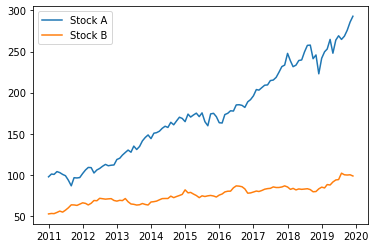

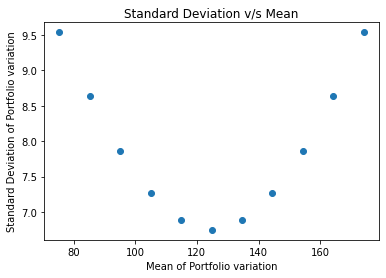

Maximum Sharpe Ratio is 5.1720402163943


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

StockA_date = pd.read_excel('D:\CAPM_FF\StocksvBonds.xlsx', sheet_name=0, usecols="A")
StockB_date = pd.read_excel('D:\CAPM_FF\StocksvBonds.xlsx', sheet_name=1, usecols="A")
StockA_data = pd.read_excel('D:\CAPM_FF\StocksvBonds.xlsx', sheet_name=0, usecols="F")
StockB_data = pd.read_excel('D:\CAPM_FF\StocksvBonds.xlsx', sheet_name=1, usecols="F")
plt.plot(StockA_date, StockA_data, label="Stock A")
plt.plot(StockB_date, StockB_data, label="Stock B")
plt.legend()
plt.show()

len1 = StockA_data.size
len2 = StockB_data.size

Mean_StockA=StockA_data.mean()
Mean_StockB=StockB_data.mean()
Var_StockA=StockA_data.var()
Var_StockB=StockB_data.var() 
Std_StockA=StockA_data.std()
Std_StockB=StockB_data.std()

#Covariance and Correlation
Data_Stocks=pd.read_excel('D:\CAPM_FF\StocksvBonds.xlsx', sheet_name=3, usecols="A,B")
Cov_Stocks=np.cov(Data_Stocks)
Cov_Stocks_mean=Cov_Stocks.mean()
Corr_Stocks=np.corrcoef(Data_Stocks)
Corr_Stocks_mean=Corr_Stocks.mean()

#Sharpe Ratio
Sharpe_Ratio_A=(Mean_StockA-StockA_data.iloc[0])/Std_StockA
Sharpe_Ratio_B=(Mean_StockB-StockB_data.iloc[0])/Std_StockB

#Stock percentage variation
Percent_A=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
Stock_variation_mean=[]
Stock_variation_std=[]
Stock_variation_sharpe=[]

for i in Percent_A:
    Stock_value_mean=(Mean_StockA*i)+(Mean_StockB*(1-i))
    Stock_variation_mean.append(Stock_value_mean)
    #Calculating the variance
    Stock_Var=(((Mean_StockA-Stock_value_mean)**2)+((Mean_StockB-Stock_value_mean)**2))/(len1-1)
    Stock_Value_std=math.sqrt(Stock_Var)
    Stock_variation_std.append(Stock_Value_std)
    Stock_Sharpe=float((((Mean_StockA+Mean_StockB)/2)-Stock_value_mean)/Stock_Value_std)
    Stock_variation_sharpe.append(Stock_Sharpe)
    
plt.scatter(Stock_variation_mean,Stock_variation_std)
plt.title("Standard Deviation v/s Mean")
plt.ylabel("Standard Deviation of Portfolio variation")
plt.xlabel("Mean of Portfolio variation")
plt.show()

print("Maximum Sharpe Ratio is", max(Stock_variation_sharpe))
